## Neighbor calculation time statistics of pyscal 2.10.15 and pyscal 3

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from pychromatic import Multiplot
from pychromatic.colors import accent

In [17]:
natoms = [250, 686, 2000, 6750,
         16000, 31250, 54000]

p2 = [5.26, 13.7, 93.4, 72.6,
     193, 397, 695]

p3 = [2.87, 18.7, 68, 287, 
     688, 1280, 2590]

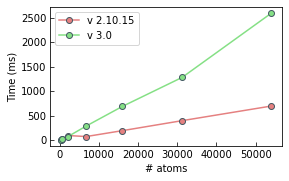

In [21]:
mlt = Multiplot(width=300)
mlt[0,0].plot(natoms, p2, 'o-', color=accent["pred"], 
              markeredgecolor=accent["lgrey"], label='v 2.10.15')
mlt[0,0].plot(natoms, p3, 'o-', color=accent["pgreen"],
             markeredgecolor=accent["lgrey"], label='v 3.0')
mlt[0,0].set_xlabel("# atoms")
mlt[0,0].set_ylabel("Time (ms)")
mlt[0,0].legend()
#mlt[0,0].set_yscale('log')
#mlt[0,0].set_xscale('log')

Effect of cell lists

In [12]:
natoms = [250, 686, 2000, 6750, 
         16000, 31250, ]

nocell = [2.78, 13.5, 93.5, 969, 
         5090, 19000]

cell = [2.32, 6.08, 20.8, 67.4, 
       177, 378]


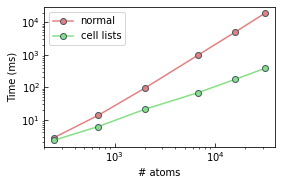

In [15]:
mlt = Multiplot(width=300)
mlt[0,0].plot(natoms, nocell, 'o-', color=accent["pred"], 
              markeredgecolor=accent["lgrey"], label='normal')
mlt[0,0].plot(natoms, cell, 'o-', color=accent["pgreen"],
             markeredgecolor=accent["lgrey"], label='cell lists')
mlt[0,0].set_xlabel("# atoms")
mlt[0,0].set_ylabel("Time (ms)")
mlt[0,0].legend()
mlt[0,0].set_yscale('log')
mlt[0,0].set_xscale('log')

In [22]:
natoms = [250, 686, 2000, 6750,
         16000, 31250, 54000]

p2 = [1587, 1612, 1686, 1882, 3133, 4692, 7837]

p3 = [110, 112, 123, 163, 242, 372, 566]

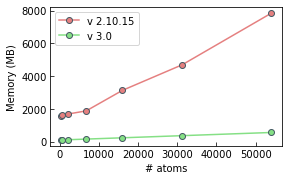

In [23]:
mlt = Multiplot(width=300)
mlt[0,0].plot(natoms, p2, 'o-', color=accent["pred"], 
              markeredgecolor=accent["lgrey"], label='v 2.10.15')
mlt[0,0].plot(natoms, p3, 'o-', color=accent["pgreen"],
             markeredgecolor=accent["lgrey"], label='v 3.0')
mlt[0,0].set_xlabel("# atoms")
mlt[0,0].set_ylabel("Memory (MB)")
mlt[0,0].legend()
#mlt[0,0].set_yscale('log')
#mlt[0,0].set_xscale('log')

### Steinhardt parameters

One parameter, system size variation. Comparison between c++ method and python method

In [2]:
natoms = [250, 686, 2000]

mp = [10.5, 27.7, 77.6]

mc = [77, 226, 702]

Now compare with number of q values; at 2000 atoms

In [3]:
qnos = [1, 2, 3, 5, 8, 11, 21, 30, 40, 50]

mp = [10.5, 21.1, 36.1, 
     81.5, 199, 389, 
     1440, 4360, 9790, 
     18300]

mc = [49.6, 77, 110, 
     200, 398, 703,
     1930, 4980, 8940, 
     13000]